# Regression linéaire

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# On charge le dataset
house_data = pd.read_csv('sample_data/rapport_loyer_surface.csv')
house_data = house_data[house_data['loyer'] < 10000]

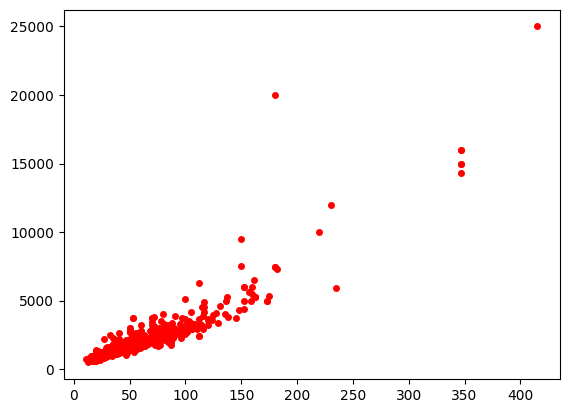

In [ ]:
# On affiche le nuage de points dont on dispose
plt.plot(house_data['surface'], house_data['loyer'], 'ro', markersize=4)
plt.show()

In [ ]:
# On décompose le dataset et on le transforme en matrices pour pouvoir effectuer notre calcul
X = np.matrix([np.ones(house_data.shape[0]), house_data['surface'].values]).T
y = np.matrix(house_data['loyer']).T

# On effectue le calcul exact du paramètre theta
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

print(theta)

[[-283.37836117]
 [  40.97116431]]


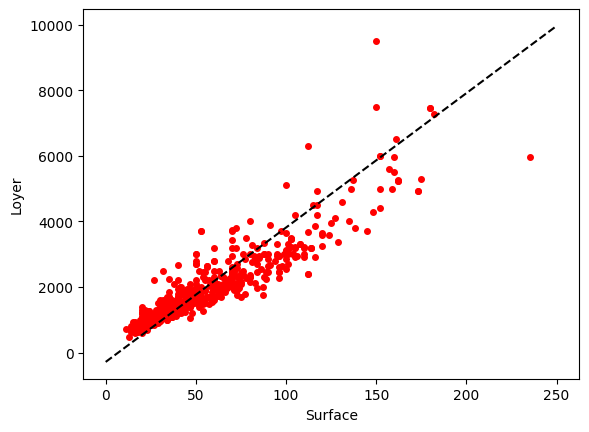

In [ ]:
plt.xlabel('Surface')
plt.ylabel('Loyer')

plt.plot(house_data['surface'], house_data['loyer'], 'ro', markersize=4)

# On affiche la droite entre 0 et 250
plt.plot([0,250], [theta.item(0),theta.item(0) + 250 * theta.item(1)], linestyle='--', c='#000000')

plt.show()

In [ ]:
#Prédictions :
surface = 1
theta.item(0) + theta.item(1) * surface

-242.40719685496356

## Avec Scikit-Learn

In [ ]:
from sklearn import linear_model

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(X, y)
#regr.predict(<des données de test>)

SyntaxError: ignored

# k-NN

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import neighbors
import matplotlib.pyplot as plt

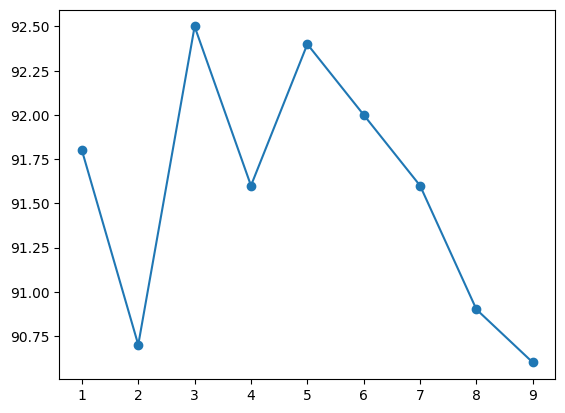

In [ ]:
sample = np.random.randint(70000, size=5000)
data = mnist.data.iloc[sample]
target = mnist.target.iloc[sample]

data_train, data_test, target_train, target_test = train_test_split(data, target, train_size=0.8)

#knn = neighbors.KNeighborsClassifier(n_neighbors=3)
#knn.fit(data_train, target_train)

#perf = knn.score(data_test, target_test)*100
#print('Performance: %f%%' % perf)

perfs = []
for k in range(1,10):
    knn = neighbors.KNeighborsClassifier(k)
    perfs.append(100*(knn.fit(data_train, target_train).score(data_test, target_test)))
plt.plot(range(1,10), perfs, 'o-')
plt.show()

## Faible entrainement

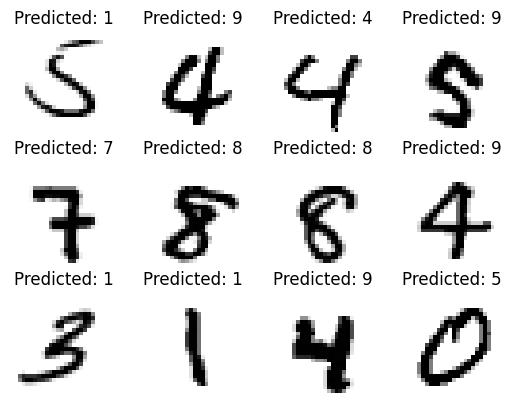

In [ ]:
sample = np.random.randint(70000, size=5000)
data = mnist.data.iloc[sample]
target = mnist.target.iloc[sample]

data_train, data_test, target_train, target_test = train_test_split(data, target, train_size=0.001)

# On récupère le classifieur le plus performant
knn = neighbors.KNeighborsClassifier(3)

data_train, data_test, target_train, target_test = train_test_split(data, target, train_size=0.01)

knn.fit(data_train, target_train)

# On récupère les prédictions sur les données test
predicted = knn.predict(data_test)

# On redimensionne les données sous forme d'images
images = data_test.values.reshape((-1, 28, 28))

# On selectionne un echantillon de 12 images au hasard
select = np.random.randint(images.shape[0], size=12)

# On affiche les images avec la prédiction associée
fig,ax = plt.subplots(3,4)

for index, value in enumerate(select):
    plt.subplot(3,4,index+1)
    plt.axis('off')
    plt.imshow(images[value],cmap=plt.cm.gray_r,interpolation="nearest")
    plt.title('Predicted: {}'.format( predicted[value]) )

plt.show()

## Fort entrainement

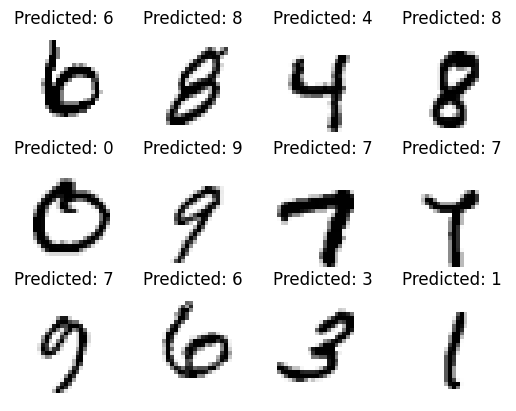

In [ ]:
sample = np.random.randint(70000, size=5000)
data = mnist.data.iloc[sample]
target = mnist.target.iloc[sample]

data_train, data_test, target_train, target_test = train_test_split(data, target, train_size=0.8)

# On récupère le classifieur le plus performant
knn = neighbors.KNeighborsClassifier(3)
knn.fit(data_train, target_train)

# On récupère les prédictions sur les données test
predicted = knn.predict(data_test)

# On redimensionne les données sous forme d'images
images = data_test.values.reshape((-1, 28, 28))

# On selectionne un echantillon de 12 images au hasard
select = np.random.randint(images.shape[0], size=12)

# On affiche les images avec la prédiction associée
fig,ax = plt.subplots(3,4)

for index, value in enumerate(select):
    plt.subplot(3,4,index+1)
    plt.axis('off')
    plt.imshow(images[value],cmap=plt.cm.gray_r,interpolation="nearest")
    plt.title('Predicted: {}'.format( predicted[value]) )

plt.show()

## Les erreurs

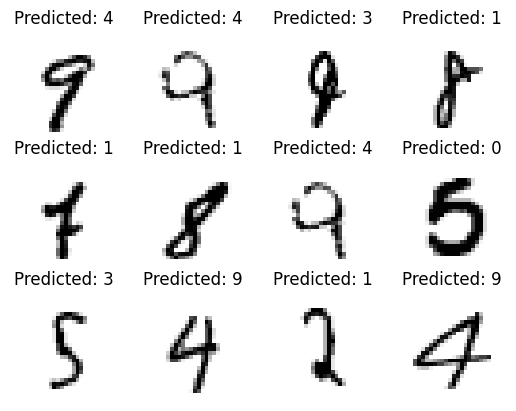

In [ ]:
# on récupère les données mal prédites
misclass = (target_test != predicted)
misclass_images = images[misclass,:,:]
misclass_predicted = predicted[misclass]

# on sélectionne un échantillon de ces images
select = np.random.randint(misclass_images.shape[0], size=12)

# on affiche les images et les prédictions (erronées) associées à ces images
for index, value in enumerate(select):
    plt.subplot(3,4,index+1)
    plt.axis('off')
    plt.imshow(misclass_images[value],cmap=plt.cm.gray_r,interpolation="nearest")
    plt.title('Predicted: {}'.format(misclass_predicted[value]) )

plt.show()